# <font color='green'><b> Open, show and convert images </b></font>

### Credits: Hands-on Image Processing with Python, Chapter 1 - Author: Sandipan Dey

### <font color='green'><b>Import libraries</b></font>

### TUTORIALS: 
- opencv: https://docs.opencv.org/5.x/d6/d00/tutorial_py_root.html
- skimage: https://scikit-image.org/docs/stable/
- matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
- numpy: https://numpy.org/devdocs/user/quickstart.html
- os: https://www.tutorialsteacher.com/python/os-module
- plotly: https://plotly.com/python/getting-started/
 

In [1]:
import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

In [2]:
import numpy as np

img_dir = './data/img/'
out_dir = './data/output/'

## <font color='green'><b> 1 - Reading, saving and displaying images </b></font>



### <font color='green'><b>  - Opening using *SCIKIT-IMAGE* or imageio.v2 </b></font> 
 
- Observe: 
    - values are uint8 (in the range [0,255])
    - the image is a numpy array
    - visualization is local

In [3]:
def im_Info(im):
    #PRINT Some Info about the image:
    print("* GENERAL INFO ABOUT THE IMAGE:")
    print("- Range of values: [" + str(np.min(im)) + ", "+ str(np.max(im)) + "]")
    print("- Img shape : " + str(im.shape))
    print("- Data type format : " + str(im.dtype))
    print("- Img type : " + str(type(im)) + "\n")

In [4]:
import imageio.v2 as imageio 

# Reading an image
im = imageio.imread(img_dir + "parrot.png")
im_Info(im)

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 255]
- Img shape : (340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>



In [5]:
from imageio.v2 import imread, imwrite   #Shortcut!!!

im = imread(img_dir + "parrot.png") # read image from disk, providing the correct path
im_Info(im)
imwrite(out_dir + "parrot.jpg", im) #save the image for example in a different format

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 255]
- Img shape : (340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>



### <font color='green'><b>  - Image plot using the function imshow of matplotlib </b></font> 
 
- `imshow` interprets a 2D or 3D NumPy array as an image.

    - If dtype is **uint8**, values are expected in [0,255].
    - If dtype is **float**, Matplotlib expects values in [0,1].
    - Values outside the expected range are **clipped**.

      👉 This is why converting images properly is important!

- If the array is 2D, it’s treated as a grayscale image
    - it is better to set `cmap="gray"` to ensure proper grayscale display.
- If the array is 3D with shape (rows, cols, 3) or (rows, cols, 4), it’s treated as RGB or RGBA.


- Support the Multiple images (side-by-side) with the commant `subplot()`

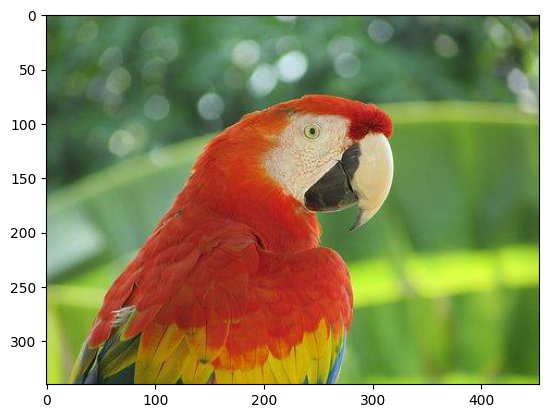

In [6]:
import matplotlib.pylab as plt
#Show the image

plt.imshow(im) #VERY SIMPLE!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0.0, 255.0]
- Img shape : (340, 453, 3)
- Data type format : float32
- Img type : <class 'numpy.ndarray'>

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0.0, 1.0]
- Img shape : (340, 453, 3)
- Data type format : float32
- Img type : <class 'numpy.ndarray'>



Text(0.5, 1.0, 'Float in the range [0.0 1.0]')

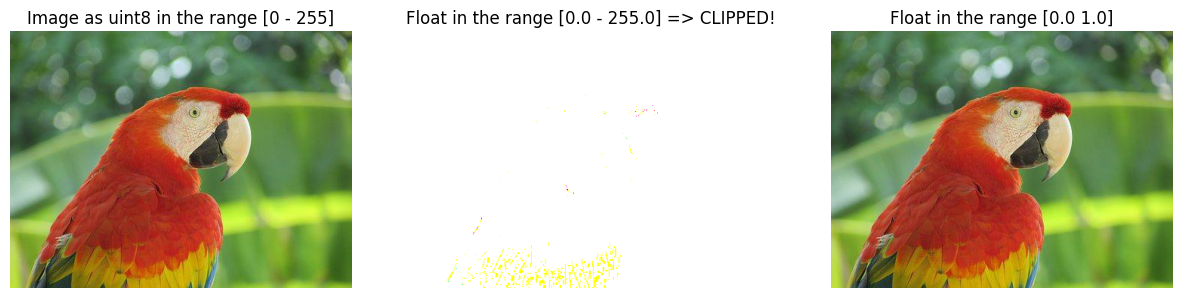

In [7]:

#Show the image sde by side observing the behavior according to the dtype!

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(im) # display the image 
plt.title('Image as uint8 in the range [0 - 255]') 

im_float = im.astype(np.float32) 
im_Info(im_float)

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(im_float) # display the image
plt.title("Float in the range [0.0 - 255.0] => CLIPPED!") 

im_float = im_float/255
im_Info(im_float)
plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(im_float) # display the image
plt.title("Float in the range [0.0 1.0]") 

### <font color='green'><b>  - Opening using *OPENCV* </b></font>

Almost the same as imageio.v2 but color channels are organized as <b>BGR</b> 

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 255]
- Img shape : (340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>



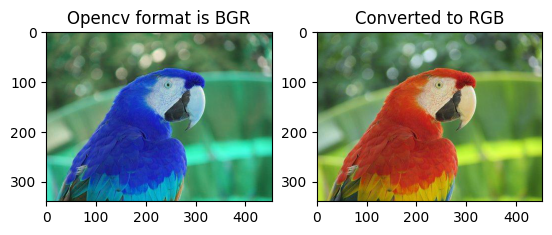

In [8]:
import cv2

im = cv2.imread(img_dir + 'parrot.png')
im_Info(im)

plt.subplot(1,2,1)
plt.title("Opencv format is BGR")
plt.imshow(im)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.title("Converted to RGB")
plt.imshow(im)
 

## <font color='green'><b>  *PLOTLY*  for interactive visualization <b></font>


In [10]:
import plotly.express as px   

px.imshow(im)

## <font color='green'><b> 2 - Convertion among data type</b></font>

- If you need a particular dtype, skimage provides utility functions that convert dtypes and properly rescale image intensities: https://scikit-image.org/docs/stable/user_guide/data_types.html

In [11]:
from skimage import img_as_float, img_as_ubyte

### <font color='green'><b> 2.1 Convert images uint8 to float using `img_as_float`<b></font>

In [12]:
im_U = imread(img_dir + "parrot.png") # read the image from disk as a numpy ndarray
im_Info(im_U)

Floats = im_U.astype(np.float64) #==> NOT AN IMAGE!!!
print( "=> It is not an Image: ")
im_Info(Floats)


#float to uint8
im_F = img_as_float(im_U) 
im_Info(im_F)

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 255]
- Img shape : (340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>

=> It is not an Image: 
* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0.0, 255.0]
- Img shape : (340, 453, 3)
- Data type format : float64
- Img type : <class 'numpy.ndarray'>

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0.0, 1.0]
- Img shape : (340, 453, 3)
- Data type format : float64
- Img type : <class 'numpy.ndarray'>



### <font color='green'><b>  2.2 Convert images from float to uint8 using `img_as_ubyte` <b></font>


In [13]:
U = im_F.astype(np.uint8) #==> NOT AN IMAGE!!!
print( "=> It is not an Image: ")
im_Info(U)
 
#float to uint8 (convert back)
im = img_as_ubyte(im_F) 
im_Info(im) 

=> It is not an Image: 
* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 1]
- Img shape : (340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 255]
- Img shape : (340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>



## <font color='green'><b> 3 - Convertion among file format </b></font>



### - Save a png image (e.g. parrot.png) in jpeg using the imageio.v2 library

In [14]:
im =  imread(img_dir + "parrot.png") # read image from disk, providing the correct path
imwrite(out_dir + "parrot.jpg", im)

### <font color='green'><b> EXERCISE 1 </b></font>
- Save a png image RGBA (e.g. hill.png) in jpeg using the imageio library
    - there might be an error (get info with obout the loaded image)
    - try to solve it

In [ ]:
#TO DO

In [16]:
#SOLUZ
im =  imread(img_dir + "hill.png") # read image from disk, provide the correct path
im_Info(im) #the image has 4 layer, one for the alpha channel (transparency), that is not supported by jpg!
 
imwrite(out_dir + "hill.jpg", im[:,:, 0:3])

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 255]
- Img shape : (960, 1280, 4)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>



## <font color='green'><b> 4 - Access to the image content </b></font>


### <font color='green'><b> 4.1 Access to one pixel in numpy <b></font>

In [17]:
img = imread(img_dir + "parrot.png")
#One pixel: 
print( "pixel value at (x,y,c)=(100,100,1) before changing: "+ str(img[100,100,1]))  
img[100,100,1] = 0
print( "pixel value at (x,y,c)=(100,100,1) after changing: "+ str(img[100,100,1]))


pixel value at (x,y,c)=(100,100,1) before changing: 124
pixel value at (x,y,c)=(100,100,1) after changing: 0


### <font color='green'><b> 4.2 Access to a layer in numpy <b></font>


Image shape is (H x W x nChannels).
the selection "I[:,:,c]" allows to access to the channel "c" 

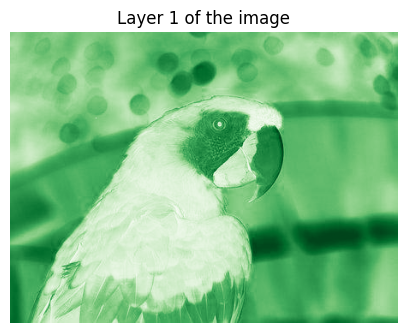

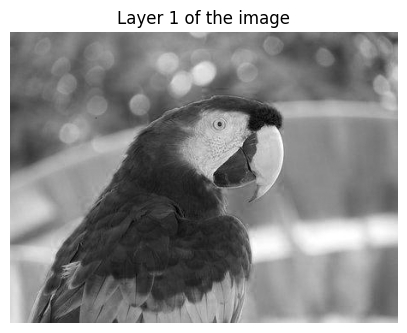

In [18]:
#One layer:
layer1 = img[:,:,1]
 
plt.figure(figsize=(5,5))
plt.axis("off")
plt.title("Layer 1 of the image")
plt.imshow(layer1, cmap='Greens')
 
plt.figure(figsize=(5,5))
plt.axis("off")
plt.title("Layer 1 of the image")
plt.imshow(layer1, cmap='gray')
plt.show()


### <font color='green'><b> 4.3  Access to a portion in numpy<b></font>

In [19]:
part = img[50:200,  200:350, :]
part.shape
px.imshow(part)

### <font color='green'><b> EXERCISE 2 </b></font>

Load the image "Viale.jpg", extract the portion $h \in \{50:100\}$,  $w \in \{100:200\}$ of **channels red and green** and compute the mean and standard deviation (std) of this portion. 

In [ ]:
#TODO

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [6, 255]
- Img shape : (186, 278, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>



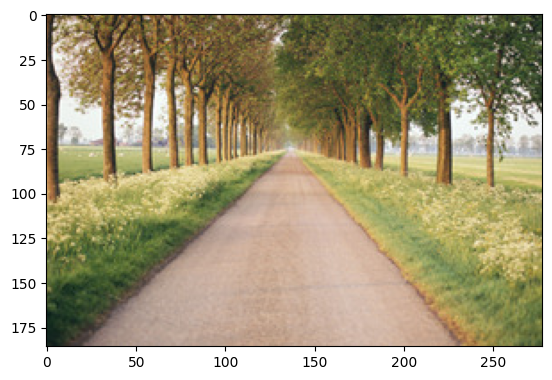

(50, 100, 2)
- Average value: 147.38
- Std value: 46.42


In [ ]:
#SOLUZ
img = imread(img_dir + 'Viale.jpg')
im_Info(img)
plt.imshow(img)
plt.show()
part = img[50:100, 100:200, :2] #select channels 0 and 1 (the extreme is exluded)
 
print(part.shape)
 
# Mean and std of all 3 channels together
mean_val = part.mean()
std_val  = part.std()

print(f"- Average value: {mean_val:.2f}")
print(f"- Std value: {std_val:.2f}")

### <font color='green'><b> 4.4 Conditioned access <b></font>

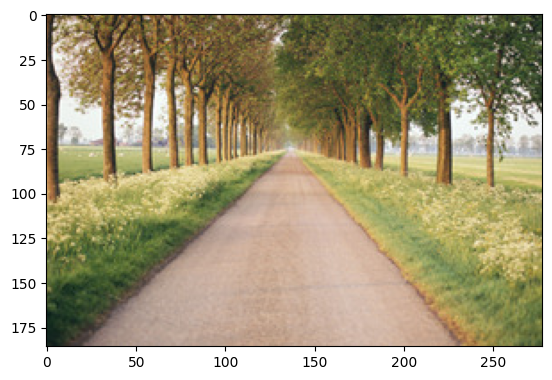

In [22]:
im = imread(img_dir + 'Viale.jpg')
plt.imshow(im)

### - make black darker pixels

bool
(186, 278)


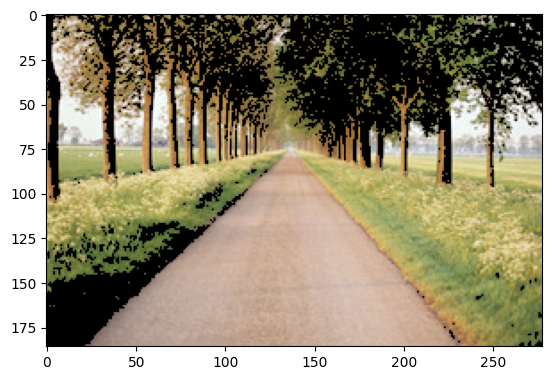

In [23]:

im = imread(img_dir + 'Viale.jpg')
 
im = img_as_float(im)
im_BW = im.copy() 
mask = im[..., 1] < 0.4 #create the mask thresholding the green layer
print(mask.dtype)
print(mask.shape)
#plt.imshow(mask)

# Mette a zero i canali RGB SOLO dove la maschera è False (valori nel canale green sotto soglia)
im_BW[mask] = 0
plt.imshow(im_BW)


### <font color='green'><b>- EXERCISE 3: </b></font>

-  Write a function that takes an RGB image and a threshold on the green channel/gray-levels. Pixels whose green/gray value is below the threshold should be darkened by multiplying their RGB values by a factor f, also provided as an input.

In [ ]:
#TODO

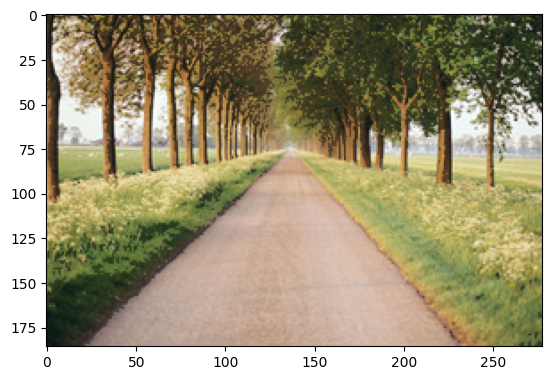

In [ ]:
#SOLUZ

from skimage import color

def darken_on_img(img, gray= 1, thr=0.5, f=0.5):
    """
    Darken pixels whose GREEN channel is below a threshold by multiplying their RGB by factor f.

    Parameters
    ----------
    img : np.ndarray
        RGB image of shape (H, W, 3). dtype can be float (0..1) or uint8 (0..255).
    gray: flag gray/green
    thr : float
        Threshold on the GREEN channel. If img is uint8 and thr <= 1, it's treated as 0..1.
        Default: 0.5
    f : float
        Darkening factor (e.g., 0.4): The lower the darker will be the result
        Default: 0.5
    Returns
    -------
    np.ndarray
        Image with the same dtype as input, darkened where G < thr.
    """

    # Convert to float in [0,1] for safe math
    x = img_as_float (img)
    
    if gray:
          mask = color.rgb2gray(x) < thr     #Mask = gray below a threshold
    else:
        # Mask: pixels to darken (green below threshold)
        mask = x[..., 1] < thr
  
    # Multiply ONLY masked pixels
    x[mask, :] *= float(f)

    return img_as_ubyte(x)

im = imread(img_dir + 'Viale.jpg')
gray = 0
out = darken_on_img(im, gray, thr=0.4, f=0.7)    # darken where G < thr
plt.imshow(out)

# <font color='green'><b> 6 - Color space conversions </b></font>


## <font color='green'><b>... using  scikit-image  </b></font>


https://scikit-image.org/docs/dev/api/skimage.color.html

- Pay attention to the data type and data range in each color space!
    - **RGB**
        - Input type: usually uint8 in [0, 255] or float in [0, 1]
        - Internal conversions: If you pass uint8, scikit-image converts to float in [0, 1]
        - Output type: floats in [0, 1]

    - **Grayscale (gray)** 
        - Produced by rgb2gray
        - Type: float64
        - Range: [0, 1]

    - **HSV** 
        - Produced by rgb2hsv, hsv2rgb
        - Type: float64
        - Range:
            - H (Hue): [0, 1] (corresponds to [0°, 360°] in color wheel)
            - S (Saturation): [0, 1].
            - V (Value/brightness): [0, 1].
    - **YCbCr** 
        - Produced by rgb2ycbcr, ycbcr2rgb
        - Type: float64
        - Range (follows ITU-R BT.601 standard, “video range”):
            - Y: [16, 235]
            - Cb, Cr: [16, 240]
        - ⚠️ Important: even if you input [0, 1] floats, the result is in these offset ranges (not normalized to [0, 1])

    - **Lab (CIE-Lab)**
        - Produced by rgb2lab, lab2rgb
        - Type: float64
        - Range:
            - L*: [0, 100].
            - a*: approx [-128, +127].
            - b*: approx [-128, +127].
        - ⚠️ Not bounded to exact integers, but values follow this scale

    - **Luv (CIE-Luv)** 
        - produced by rgb2luv, luv2rgb
        - Type: float64.
        - Range:
            - L*: [0, 100]
            - u*, v*: roughly [-134, 220] depending on the gamut

    - **XYZ** 
        - Produced by rgb2xyz, xyz2rgb
        - Type: float64.
        - Range: typically [0, 1], but not strictly bounded — can exceed 1 for bright colors

    - **YUV** 
        -Produced by rgb2yuv, yuv2rgb
        - Type: float64
        - Range:
            - Y: [0, 1]
            - U, V: approx [-0.5, +0.5]

- RGB to GRAY

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0, 255]
- Img shape : (340, 453, 3)
- Data type format : uint8
- Img type : <class 'numpy.ndarray'>

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0.0036388235294117647, 0.9949105882352942]
- Img shape : (340, 453)
- Data type format : float64
- Img type : <class 'numpy.ndarray'>



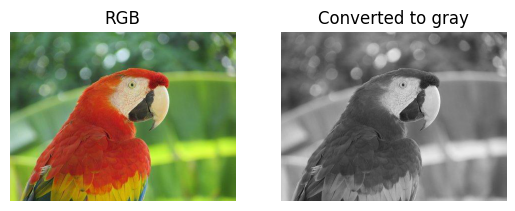

In [25]:
from skimage import color

#CONVERT TO GRAY

im = imread(img_dir + "parrot.png")
im_Info(im)

#TO TRANSFORM IN GRAY  
im_gray = color.rgb2gray(im)
im_Info(im_gray)
 
plt.subplot(121), plt.imshow(im ), plt.axis('off'), plt.title('RGB')
plt.subplot(122), plt.imshow(im_gray, cmap='gray'), plt.axis('off'), plt.title("Converted to gray")
plt.show()

- RGB to HSV (and vice versa)

* GENERAL INFO ABOUT THE IMAGE:
- Range of values: [0.0, 1.0]
- Img shape : (340, 453, 3)
- Data type format : float64
- Img type : <class 'numpy.ndarray'>



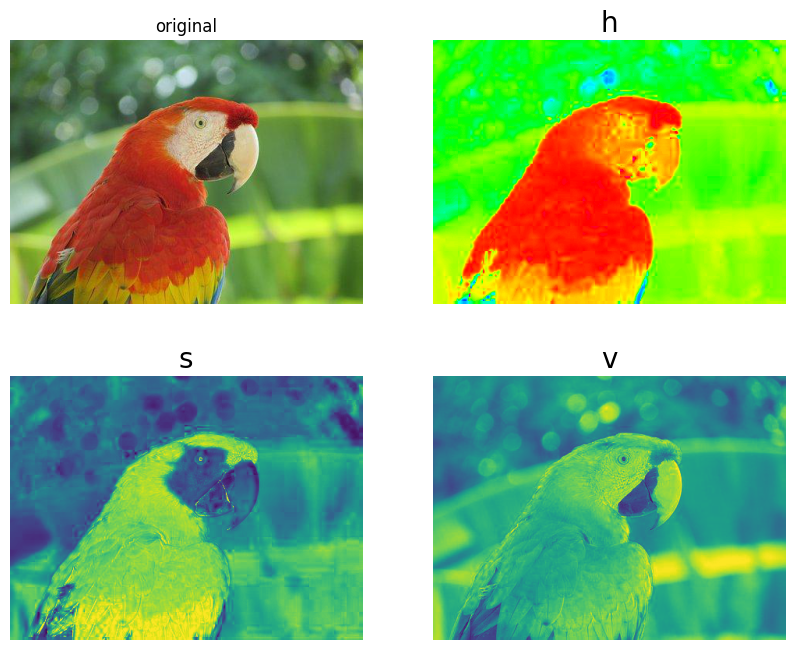

(Text(0.5, 1.0, 'reconstructed '),
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 <matplotlib.image.AxesImage at 0x1407adbd0>)

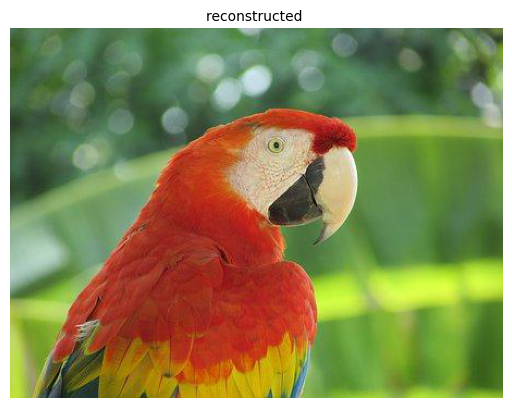

In [26]:
#CONVERT TO HSV

hsv = color.rgb2hsv(im) # from RGB to HSV color space 
im_Info(hsv)
 
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(im), plt.title('original')
plt.axis('off')
plt.subplot(222), plt.imshow(hsv[...,0], cmap='hsv'), plt.title('h', size=20),
plt.axis('off')
plt.subplot(223), plt.imshow(hsv[...,1] ), plt.title('s', size=20),
plt.axis('off')
plt.subplot(224), plt.imshow(hsv[...,2] ), plt.title('v', size=20),
plt.axis('off')
plt.show()

im1 = color.hsv2rgb(hsv) # from HSV back to RGB
plt.title('reconstructed ', size=10), plt.axis('off'), plt.imshow(im1) 

### <font color='green'><b>- EXERCISE 4: </b></font>

### Convert the image "im" in CIELab and show the single layers separately using the subplot function of matplotlib 


<class 'numpy.ndarray'> (186, 278, 3)


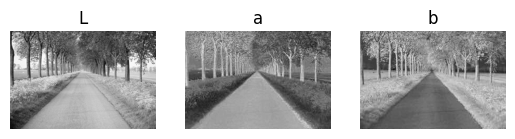

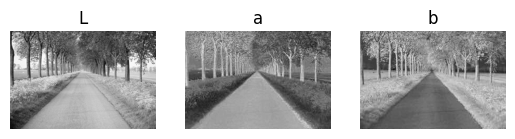

In [402]:
#CONVERT TO CIE-Lab

Lab = color.rgb2lab(im)
 
print(type(Lab), Lab.shape)
plt.gray()

# SHOW USING SUBPLOT:
plt.subplot(1,3,1)
plt.imshow(Lab[:,:,0])
plt.title('L')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Lab[:,:,1])
plt.title('a')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(Lab[:,:,2])
plt.title('b')
plt.axis('off')
plt.show()


# OR, MORE COMPACTLY: 
 
for ind, layer in  enumerate(['L',  'a', 'b']):
    plt.subplot(1,3,ind+1)    
    plt.title(layer)
    plt.imshow(Lab[:,:,ind])
    plt.axis('off')

  

### <font color='green'><b>- EXERCISE 5: </b></font>
 
Write a function `replace_hsv_channel` that, given an image in RGB:

1. Converts it to the HSV color space.
2. Replaces one chosen channel (**Hue**, **Saturation**, or **Value**) with a constant `const_value` (REMEMBER: values in hsv are in the range [0.,1.]).
3. Converts the result back to RGB and returns the modified image.

**Question:**
Which channel replacement produces the **smallest visible effect** on the reconstructed image?
 

(<Axes: title={'center': 'Transformed image'}>,
 Text(0.5, 1.0, 'Transformed image'))

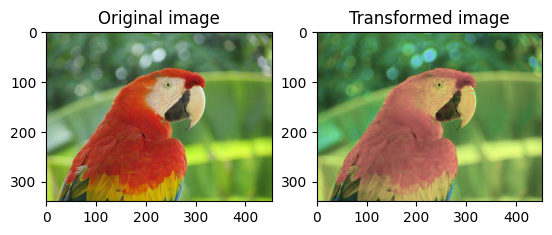

In [28]:
#TO DO
from skimage import color

def replace_hsv_channel(rgb_img, channel=1, const_value=0.5):
    """
    Replace one HSV channel with a constant and return the new RGB image.
    - rgb_img: rgb image, shape (H,W,3)
    - channel: "0" for the hue channel, "1" for the saturation channel, or "2" for the value
    - const_value: constant value to be apply to "channel"
    Returns: rgb_img
    """
    # [TODO]    
    hsv_img = color.rgb2hsv(rgb_img) # from RGB to HSV color space    
 
    hsv_img[..., channel] = const_value
    rgb_rec = color.hsv2rgb(hsv_img) 
    return  (rgb_rec)
    
img = imread(img_dir + "parrot.png")
im_rec = replace_hsv_channel(img, 1, 0.5)
plt.subplot(1,2,1), plt.imshow(img), plt.title('Original image') 
plt.subplot(1,2,2), plt.imshow(im_rec), plt.title('Transformed image')  

#  7 - Operations on pairs of images 


### 7.1 Adding two images  


(340, 453, 3)
(340, 453, 3)


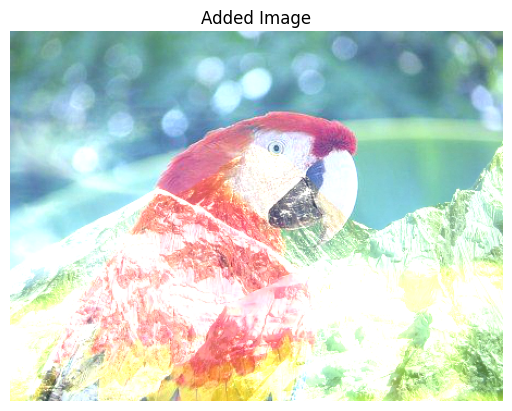

In [29]:
from skimage.transform import resize

# Load the images using OpenCV
im1 = imread(img_dir + "parrot.png")
im2 = imread(img_dir + "hill.jpg")
 

# Resize im2 to match im1 dimensions 
im2_resized = resize( im2, (im1.shape[0], im1.shape[1]), anti_aliasing=True, preserve_range=True).astype(im1.dtype)  # keep the same dtype as im1
print(im1.shape)
print(im2_resized.shape)
# Perform the 'add' operation equivalent to PIL.ImageChops.add
added_image = cv2.add(im1, im2_resized)
 
# Display the result using Matplotlib
 
plt.imshow(added_image)
plt.axis('off')
plt.title("Added Image")
plt.show()

### <font color='green'><b>- EXERCISE 6: Compute the difference between two images  </b></font>
Write a function that receive two images, convert them in gray scale, compute the difference and threshold it
NB: if the two images are frames of a video...**You get your first MOTION DETECTION!!!**

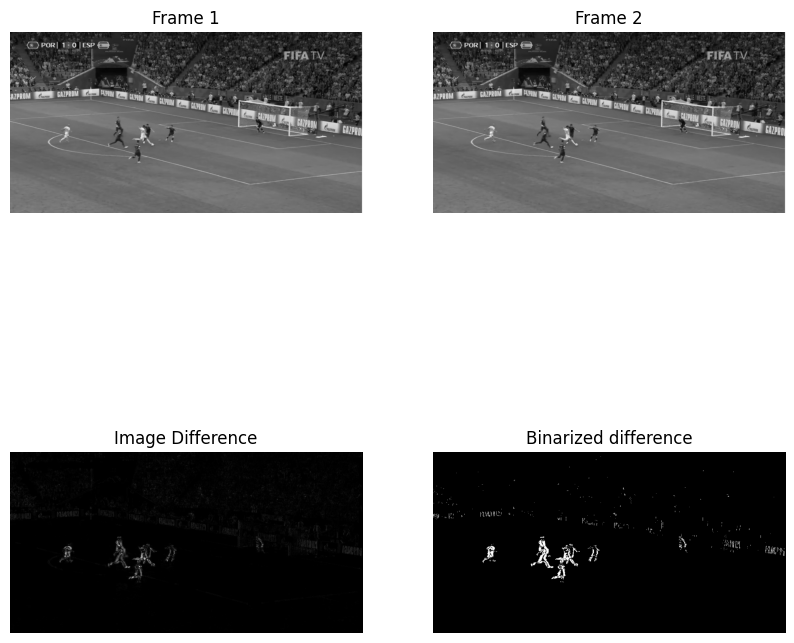

In [409]:
from skimage.color import rgb2gray
import cv2

def frame_diff(img1, img2, thr):

    im1 = rgb2gray(img1)
    im2 = rgb2gray(img2)
   
    # Compute the absolute difference between the two images
    diff = cv2.absdiff(im1, im2)
    out = diff>=thr
    
    # Plotting the images
    plt.figure(figsize=(10, 10))

    plt.subplot(221)
    plt.imshow(im1)
    plt.axis('off')
    plt.title("Frame 1")

    plt.subplot(222)
    plt.imshow(im2)
    plt.axis('off')
    plt.title("Frame 2")

    plt.subplot(223)
    plt.imshow(diff)
    plt.axis('off')
    plt.title("Image Difference")
    
    plt.subplot(224)
    plt.imshow(out)
    plt.axis('off')
    plt.title("Binarized difference")
    plt.show()
    return out
 
# Load two consecutive frame images from the video
im1 = imread(img_dir + "goal1.png")
im2 = imread(img_dir + "goal2.png")
out = frame_diff(im1, im2, 0.1)